# NOTE

In [ ]:
from pathlib import Path
import pandas as pd
from datetime import datetime

# กำหนดโฟลเดอร์หลัก
base_path = Path(r"\\10.1.1.124\Project")  # เปลี่ยนเป็น path ของคุณ
target = r"D:\My Documents\sutripat.ng\OneDrive - Thainamthip\1. Work\TDWPBI_Project.xlsx"
rows = []

for item in base_path.rglob("*"):
    if item.is_file():
        # โฟลเดอร์ relative path
        folder = str(item.parent.relative_to(base_path))
        if folder == ".":
            folder = ""
            top_folder = ""
        else:
            folder = folder.replace("/", "\\") + "\\"
            # top folder คือโฟลเดอร์แรก
            top_folder = folder.split("\\")[0]

        rows.append({
            "No": len(rows) + 1,
            "Path" : str(item),
            "Project": top_folder,
            "FolderPath" : folder,
            "File": item.name,
            "ExecuteDate": datetime.now()
        })

df = pd.DataFrame(rows)

# แสดงผลโดยไม่แสดง index
display(df)

df.to_excel(target, index=False)

,No,Path,TopFolder,Folder,File,ExecuteDate
0,1,\\10.1.1.124\Project\How to install AccessData...,,,How to install AccessDatabaseEngine.txt,2025-11-18 08:47:14.004240
1,2,\\10.1.1.124\Project\Thumbs.db,,,Thumbs.db,2025-11-18 08:47:14.099493
2,3,\\10.1.1.124\Project\# BACKUP\Fix_Code_2019031...,# BACKUP,# BACKUP\,Fix_Code_20190318.zip,2025-11-18 08:47:14.461415
3,4,\\10.1.1.124\Project\# BACKUP\Project-20190920...,# BACKUP,# BACKUP\,Project-20190920.zip,2025-11-18 08:47:14.479235
4,5,\\10.1.1.124\Project\# BACKUP\Project.zip,# BACKUP,# BACKUP\,Project.zip,2025-11-18 08:47:14.488870
...,...,...,...,...,...,...
14960,14961,\\10.1.1.124\Project\ZTEMP\PIC\Design C\l_o-da...,ZTEMP,ZTEMP\PIC\Design C\,l_o-dashboard-CC-C-Icon-HRC.png,2025-11-18 08:52:21.507585
14961,14962,\\10.1.1.124\Project\ZTEMP\PIC\Design C\l_o-da...,ZTEMP,ZTEMP\PIC\Design C\,l_o-dashboard-CC-C-Icon-MK.png,2025-11-18 08:52:21.520584
14962,14963,\\10.1.1.124\Project\ZTEMP\PIC\Design C\l_o-da...,ZTEMP,ZTEMP\PIC\Design C\,l_o-dashboard-CC-C-Icon-SPHP.png,2025-11-18 08:52:21.533656
14963,14964,\\10.1.1.124\Project\ZTEMP\PIC\Design C\l_o-da...,ZTEMP,ZTEMP\PIC\Design C\,l_o-dashboard-CC-C-Icon-TT.png,2025-11-18 08:52:21.546970


In [5]:
from datetime import datetime

print(datetime.now())

2025-11-18 08:43:36.522342


In [2]:
import pandas as pd

rowin = []
data = {"No":1, "Name":"Sutripa", "Year":2}

rowin.append(data)
print(rowin)

[{'No': 1, 'Name': 'Sutripa', 'Year': 2}]


In [2]:
# -------------- Step 1 : Query MsSQL and DELETE Historical data 3 months --------------

from sqlalchemy import create_engine, text, DECIMAL
import urllib
import pandas as pd

# ตั้งค่า connection
params = urllib.parse.quote_plus(
    "DRIVER={ODBC Driver 17 for SQL Server};"
    "SERVER=TDWPOWERBI;"   
    "DATABASE=TNTL_PUR;"
    "UID=tntlbiadmin;"             # SQL Login user
    "PWD=admin@123;"  # รหัสผ่าน
)
engine = create_engine(f"mssql+pyodbc:///?odbc_connect={params}")


# เขียน SQL Query
sql_query = """
    SELECT * 
    FROM dbo.STG_Sugar
    """

# แสดงผลลัพธ์
df = pd.read_sql(sql_query, engine)
display(df)

,YEAR,MONTH,PRICE,UPDATE DATE
0,2017,1,489.36,2025-09-04 15:16:10.377
1,2017,2,497.46,2025-09-04 15:16:10.377
2,2017,3,479.28,2025-09-04 15:16:10.377
3,2017,4,454.86,2025-09-04 15:16:10.377
4,2017,5,445.72,2025-09-04 15:16:10.377
...,...,...,...,...
101,2025,6,471.79,2025-09-29 14:41:17.847
102,2025,8,479.40,2025-11-07 10:45:13.980
103,2025,9,473.55,2025-11-07 10:45:13.980
104,2025,10,440.38,2025-11-07 10:45:13.980


In [3]:
df = pd.read_sql(sql_query, engine)
df = df.set_index('YEAR')
df = df.groupby('YEAR').agg({'PRICE':['min','max','mean']}).reset_index()
df.columns = ['_'.join(col).strip('_') for col in df.columns]
df = df.rename(columns={'PRICE_min':'MIN', 'PRICE_max':'MAX', 'PRICE_mean':'MEAN'})
display(df)

,YEAR,MIN,MAX,MEAN
0,2017,381.10,497.46,428.855000
1,2018,315.64,376.51,343.465000
2,2019,320.95,353.38,337.646667
3,2020,325.49,413.26,374.401667
4,2021,431.17,498.51,467.401667
5,2022,493.40,538.20,515.200000
6,2023,527.00,714.20,628.841667
7,2024,501.20,610.00,543.791667
8,2025,440.38,513.20,478.253000


<>:12: SyntaxWarning: invalid escape sequence '\E'
<>:12: SyntaxWarning: invalid escape sequence '\E'
D:\Users\sutripat.ng\AppData\Local\Temp\ipykernel_44132\1072239918.py:12: SyntaxWarning: invalid escape sequence '\E'
  plt.savefig('01_DataScience\ExportFile\picture4.png')


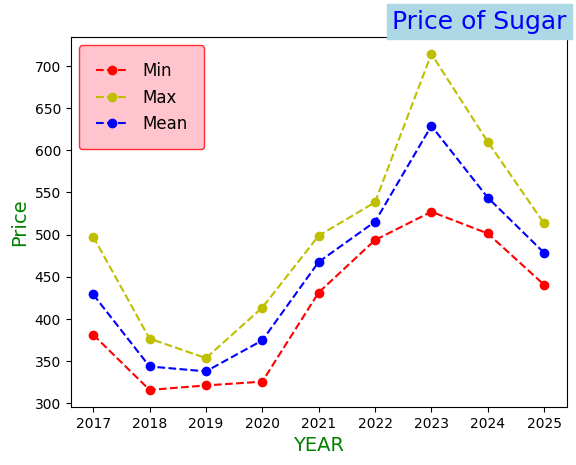

In [38]:
import matplotlib.pyplot as plt
x = df['YEAR']
y1 = df['MIN']
y2 = df['MAX']
y3 = df['MEAN']
plt.plot(x,y1, 'ro--')
plt.plot(x,y2, 'yo--')
plt.plot(x,y3, 'bo--')
plt.xlabel('YEAR', size=14, color='green')
plt.ylabel('Price', size=14, color='green')
plt.title('Price of Sugar', size=18, color='blue', backgroundcolor='lightblue', loc='right')
plt.savefig('01_DataScience\ExportFile\picture4.png')
plt.legend(['Min','Max', 'Mean'], loc=2, facecolor='lightpink', edgecolor='red', borderpad=1, fontsize=12)